In [1]:
import pandas as pd
import os
wd = os.getcwd()
path = wd + '/Downloads/AirQuality_2020Data.csv'
df = pd.read_csv(path)
df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-01-01,US,Brooklyn,o3,20,18.4,28.9,21.6,111.76
1,2020-01-01,US,Brooklyn,pm25,168,1.0,54.0,30.0,1299.37
2,2020-01-02,US,Brooklyn,o3,24,4.8,24.8,18.4,388.30
3,2020-01-02,US,Brooklyn,pm25,166,9.0,88.0,51.0,1362.51
4,2020-01-02,US,Brooklyn,wind-speed,16,0.2,7.0,1.7,60.69


In [2]:
import findspark
findspark.init()
import pyspark as spark
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from pyspark import SparkContext, SQLContext
sc = SparkContext()
s = SQLContext(sc)
data = s.read.options(header=True).csv(path)
data.createOrReplaceTempView("data")
data.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Specie: string (nullable = true)
 |-- count: string (nullable = true)
 |-- min: string (nullable = true)
 |-- max: string (nullable = true)
 |-- median: string (nullable = true)
 |-- variance: string (nullable = true)



In [3]:
olvl = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS smog
    FROM data
    WHERE Specie = 'o3'
    GROUP BY MONTH(Date)”””)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-3-4aff81d30f0b>, line 5)

In [4]:
olvl = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS smog
    FROM data
    WHERE Specie = 'o3'
    GROUP BY MONTH(Date)""")

In [5]:
print(olvl)

DataFrame[month: int, smog: double]


<IPython.core.display.Javascript object>


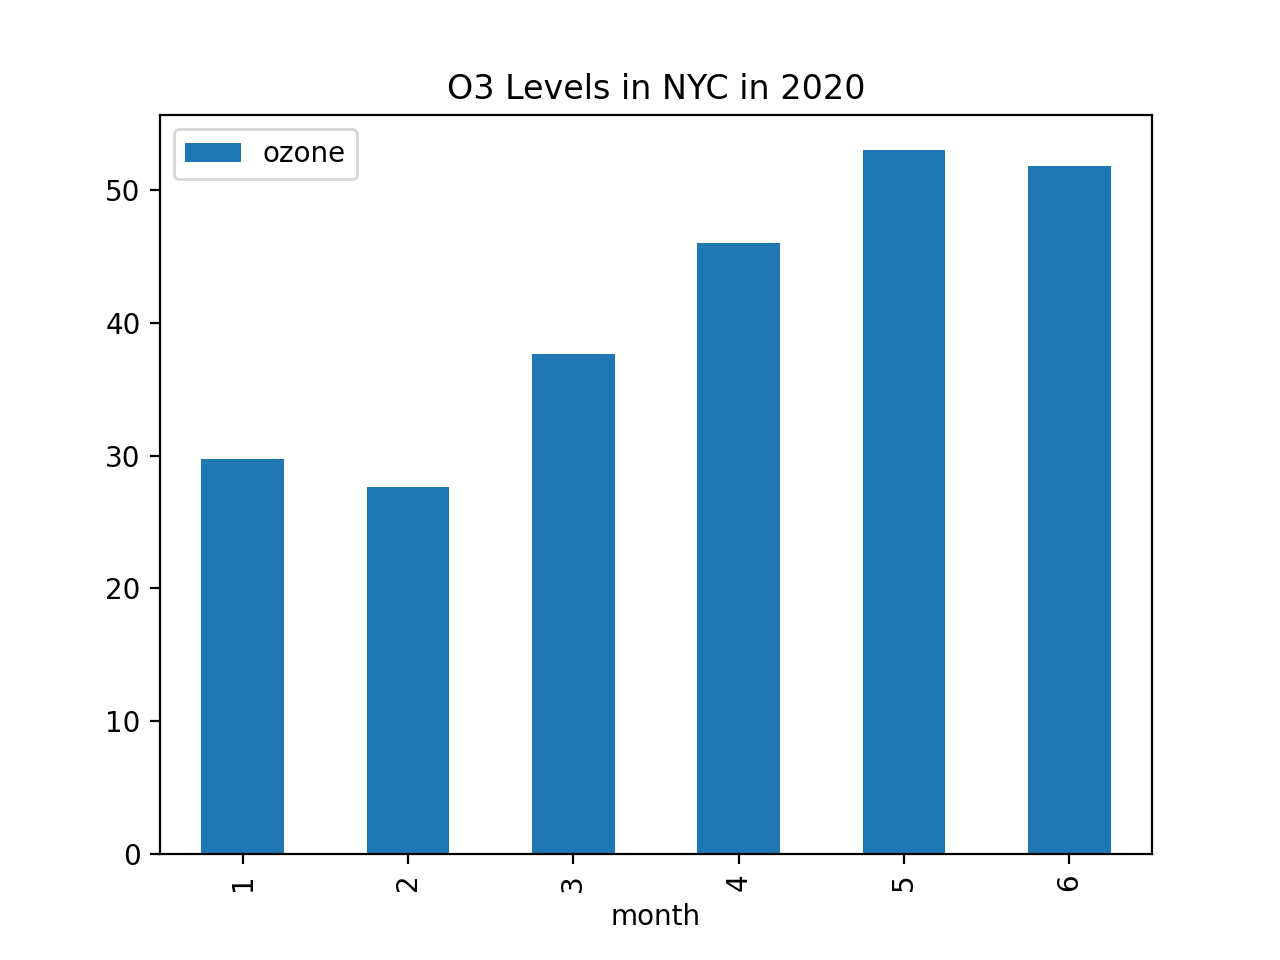

In [9]:
olvl = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS ozone
    FROM data
    WHERE Specie = 'o3'
    GROUP BY MONTH(Date)""")
olvl = olvl.toPandas()
olvl1 = olvl.sort_values('month')
olvl1.plot(kind='bar',title='O3 Levels in NYC in 2020',x='month',y= 'ozone')
plt.show()

<IPython.core.display.Javascript object>


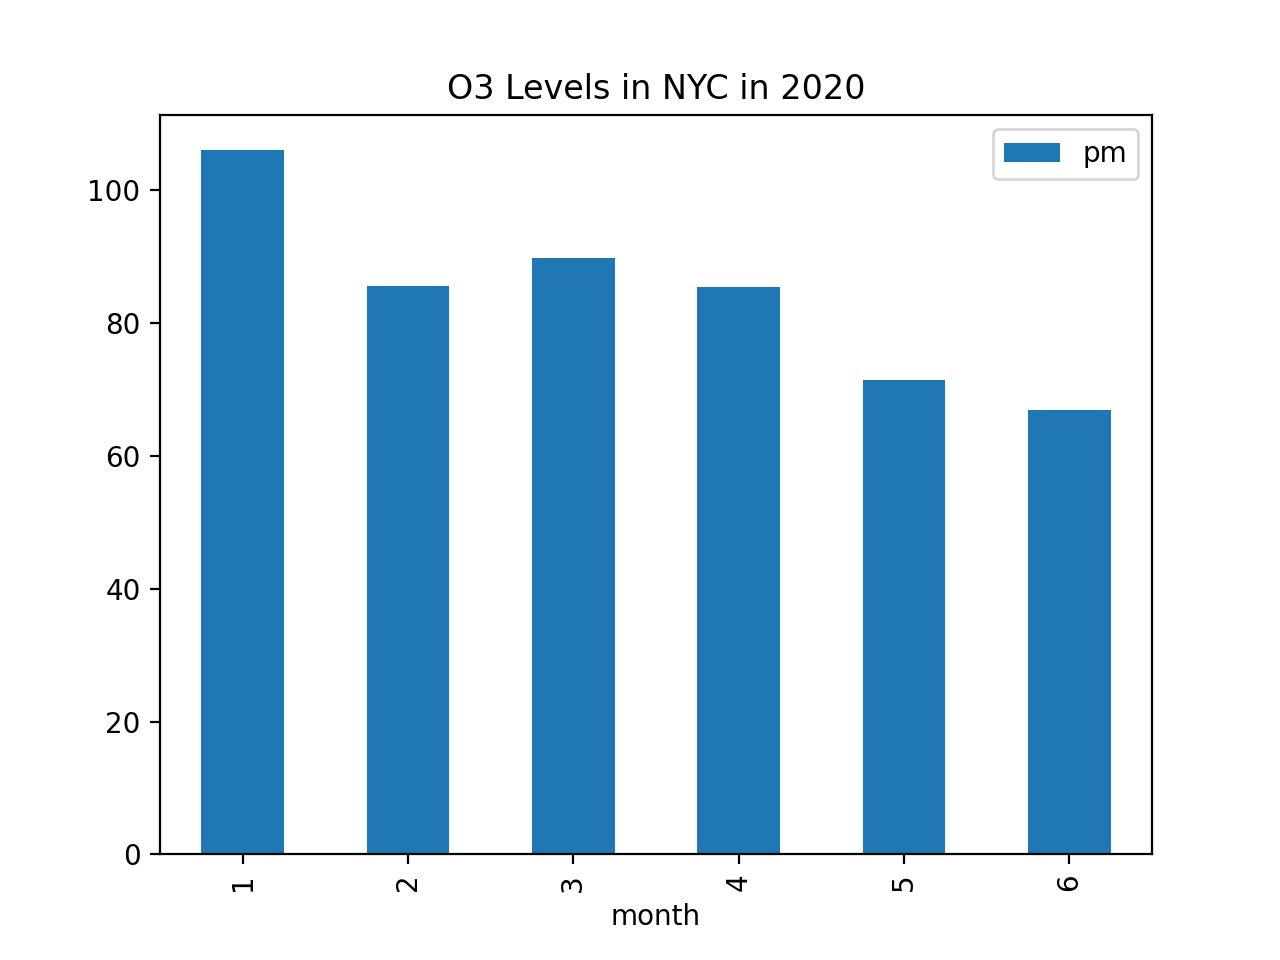

In [10]:
pm = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS pm
    FROM data
    WHERE Specie = 'pm25'
    GROUP BY MONTH(Date)""")
pm = pm.toPandas()
pm1 = pm.sort_values('month')
pm1.plot(kind='bar',title='O3 Levels in NYC in 2020',x='month',y= 'pm')
plt.show()

<IPython.core.display.Javascript object>


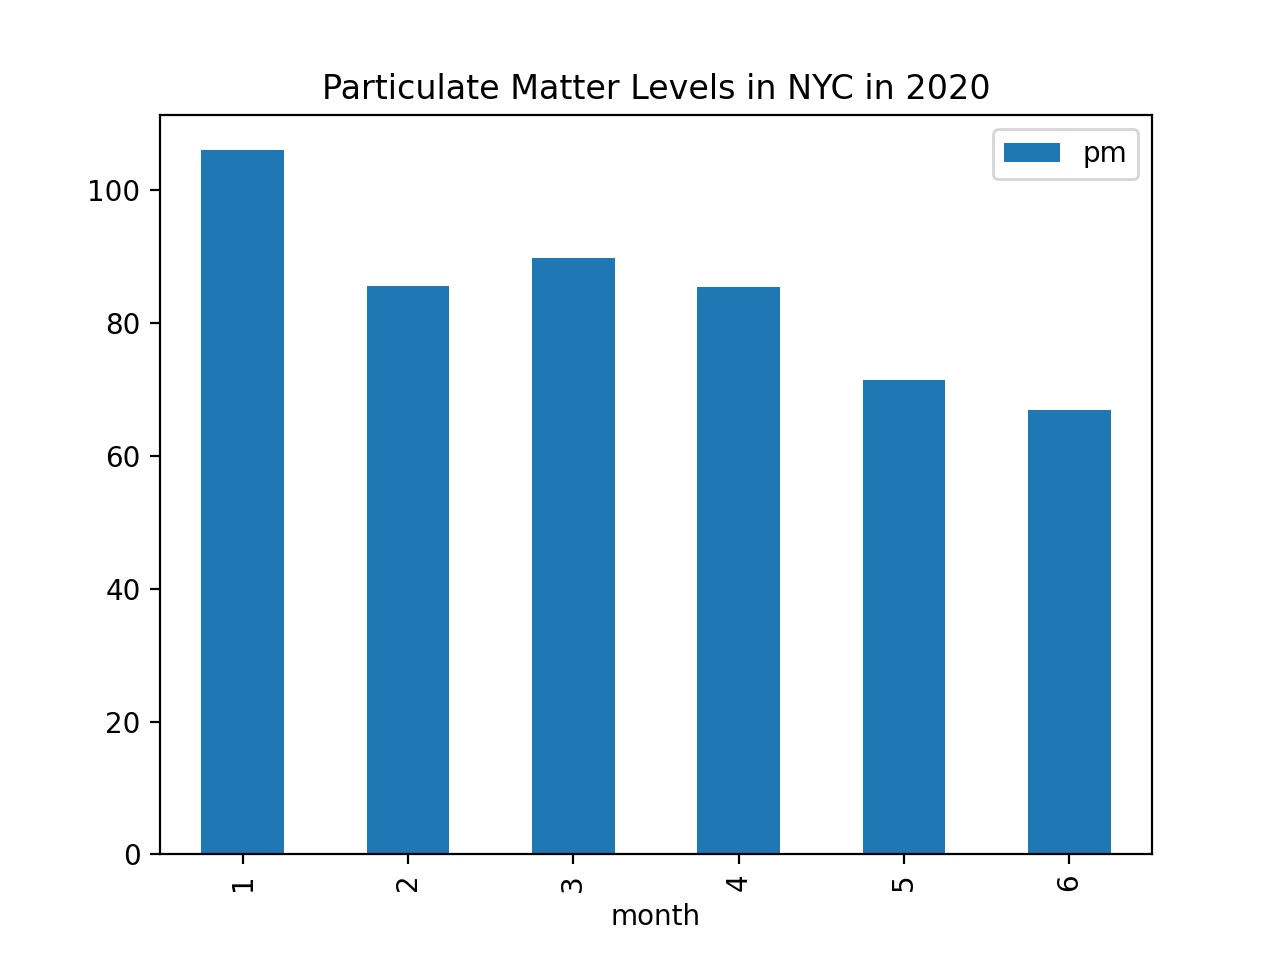

In [11]:
pm = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS pm
    FROM data
    WHERE Specie = 'pm25'
    GROUP BY MONTH(Date)""")
pm = pm.toPandas()
pm1 = pm.sort_values('month')
pm1.plot(kind='bar',title='Particulate Matter Levels in NYC in 2020',x='month',y= 'pm')
plt.show()

<IPython.core.display.Javascript object>


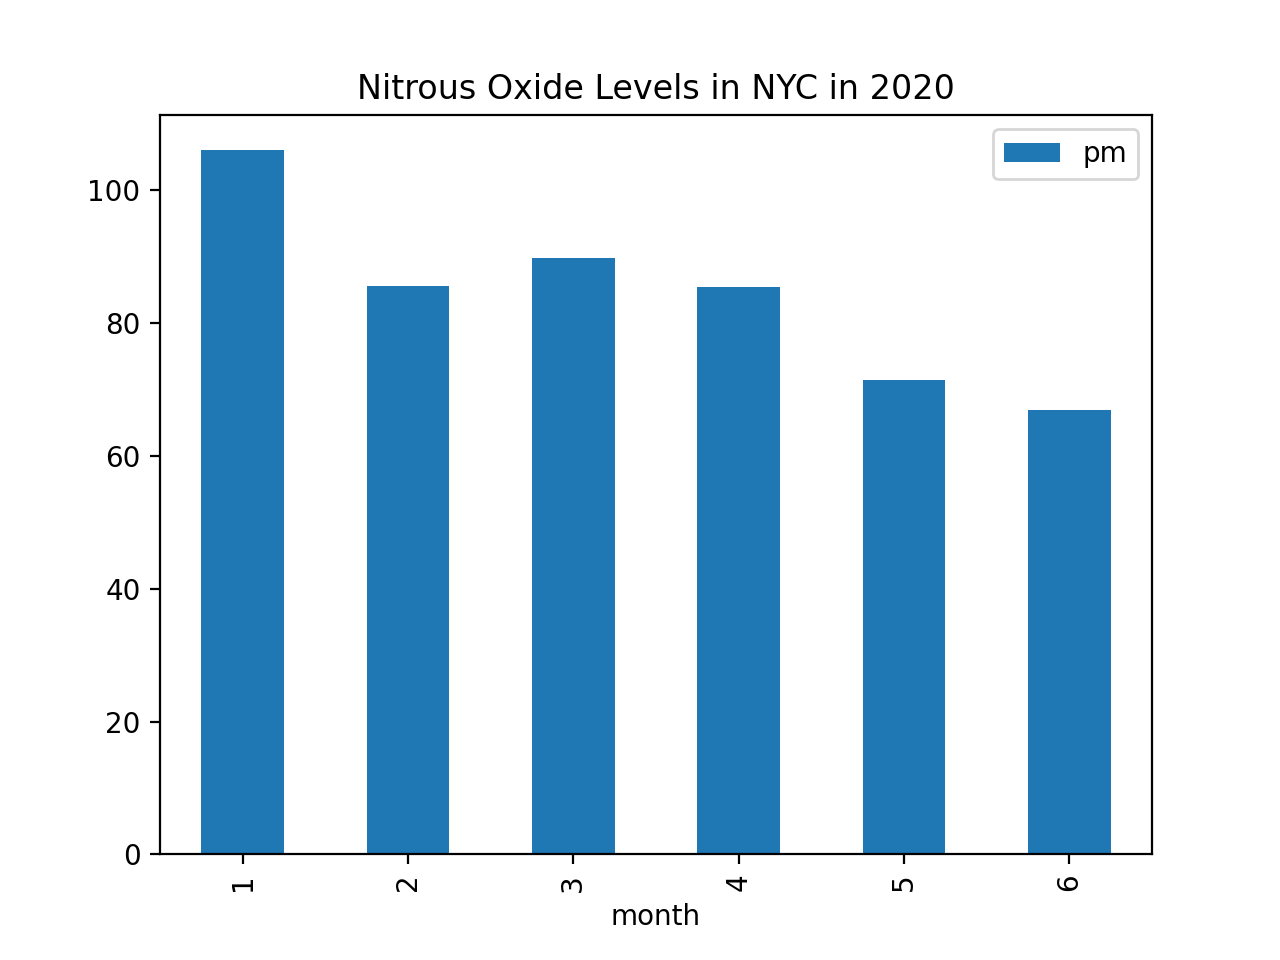

In [12]:
no = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS pm
    FROM data
    WHERE Specie = 'no'
    GROUP BY MONTH(Date)""")
no = no.toPandas()
no1 = no.sort_values('month')
pm1.plot(kind='bar',title='Nitrous Oxide Levels in NYC in 2020',x='month',y= 'pm')
plt.show()

<IPython.core.display.Javascript object>


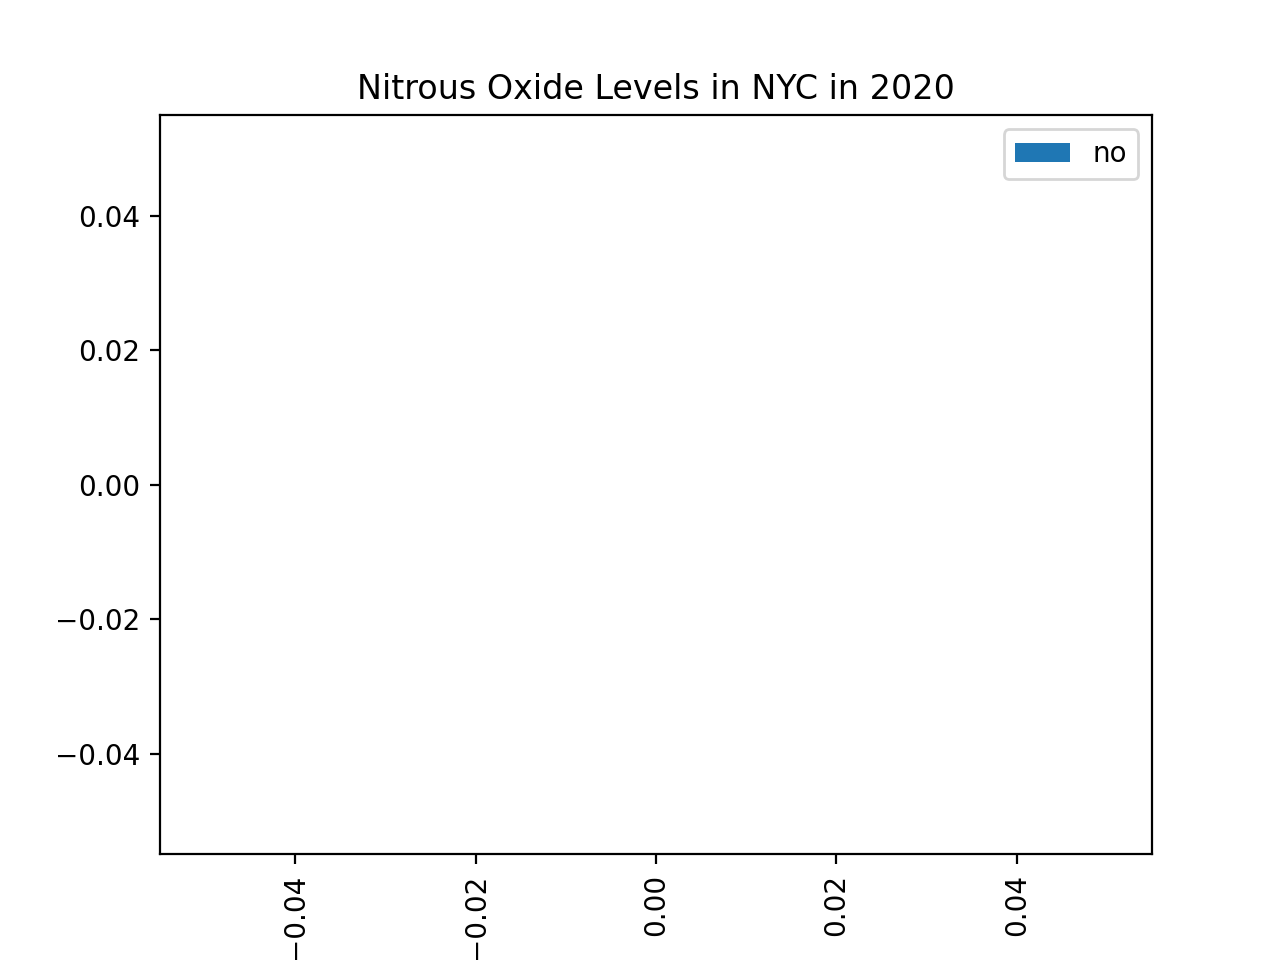

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
no = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS no
    FROM data
    WHERE Specie = 'no'
    GROUP BY MONTH(Date)""")
no = no.toPandas()
no1 = no.sort_values('month')
no1.plot(kind='bar',title='Nitrous Oxide Levels in NYC in 2020',x='month',y= 'no')
plt.show()

<IPython.core.display.Javascript object>


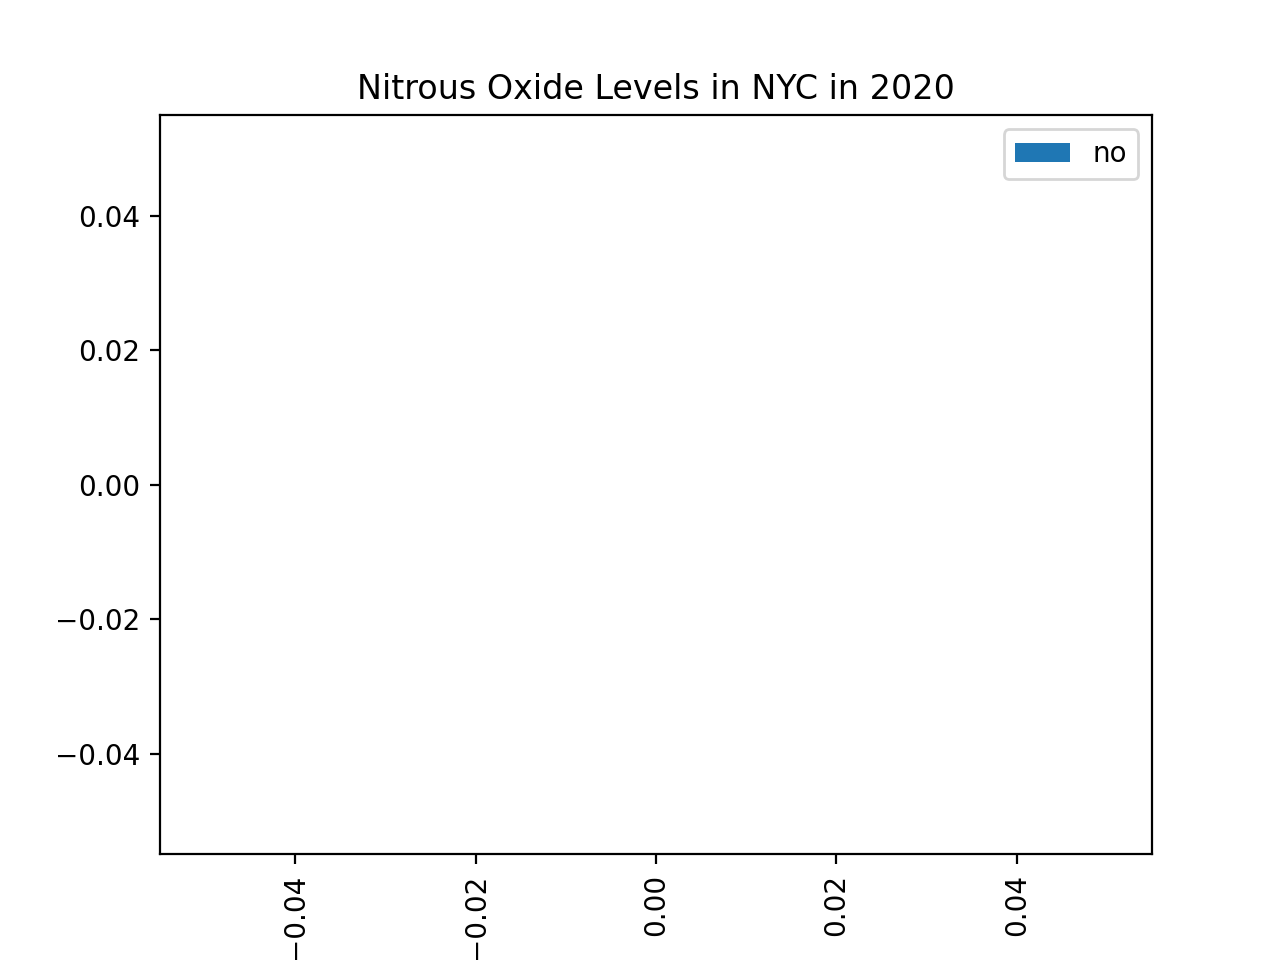

IndexError: index 0 is out of bounds for axis 0 with size 0

In [14]:
no = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS no
    FROM data
    WHERE Specie = 'no'
    GROUP BY MONTH(Date)""")
no = no.toPandas()
no1 = no.sort_values('month')
no1.plot(kind='bar',title='Nitrous Oxide Levels in NYC in 2020',x='month',y= 'no')
plt.show()

In [15]:
no = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS no
    FROM data
    WHERE Specie = 'no2'
    GROUP BY MONTH(Date)""")
no = no.toPandas()
no1 = no.sort_values('month')
no1.plot(kind='bar',title='Nitrous Oxide Levels in NYC in 2020',x='month',y= 'no2')
plt.show()

KeyError: 'no2'

<IPython.core.display.Javascript object>


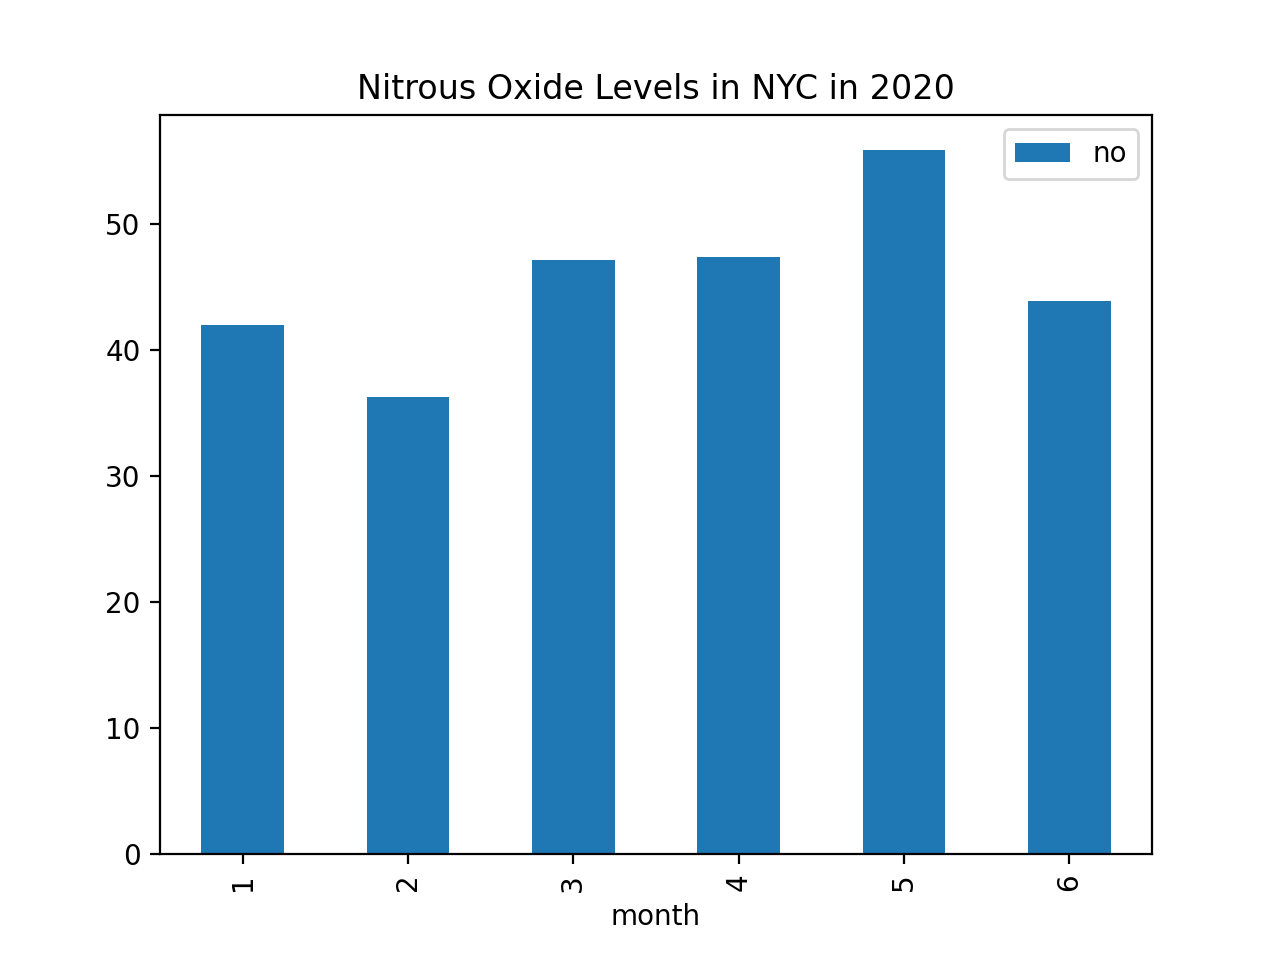

In [16]:
no = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS no
    FROM data
    WHERE Specie = 'no2'
    GROUP BY MONTH(Date)""")
no = no.toPandas()
no1 = no.sort_values('month')
no1.plot(kind='bar',title='Nitrous Oxide Levels in NYC in 2020',x='month',y= 'no')
plt.show()

<IPython.core.display.Javascript object>


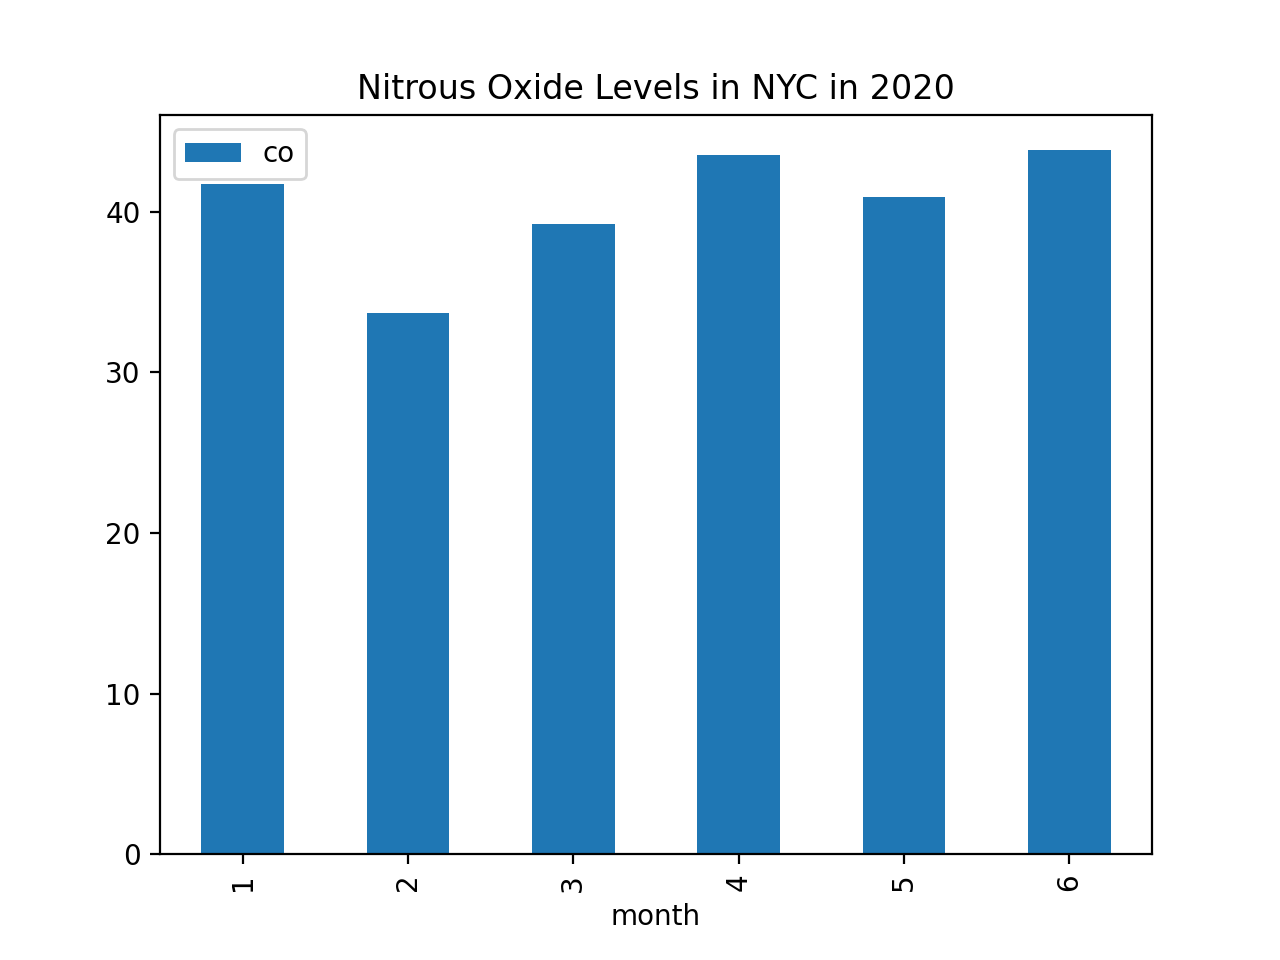

In [17]:
co = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS co
    FROM data
    WHERE Specie = 'co'
    GROUP BY MONTH(Date)""")
co = co.toPandas()
co1 = co.sort_values('month')
co1.plot(kind='bar',title='Nitrous Oxide Levels in NYC in 2020',x='month',y= 'co')
plt.show()

<IPython.core.display.Javascript object>


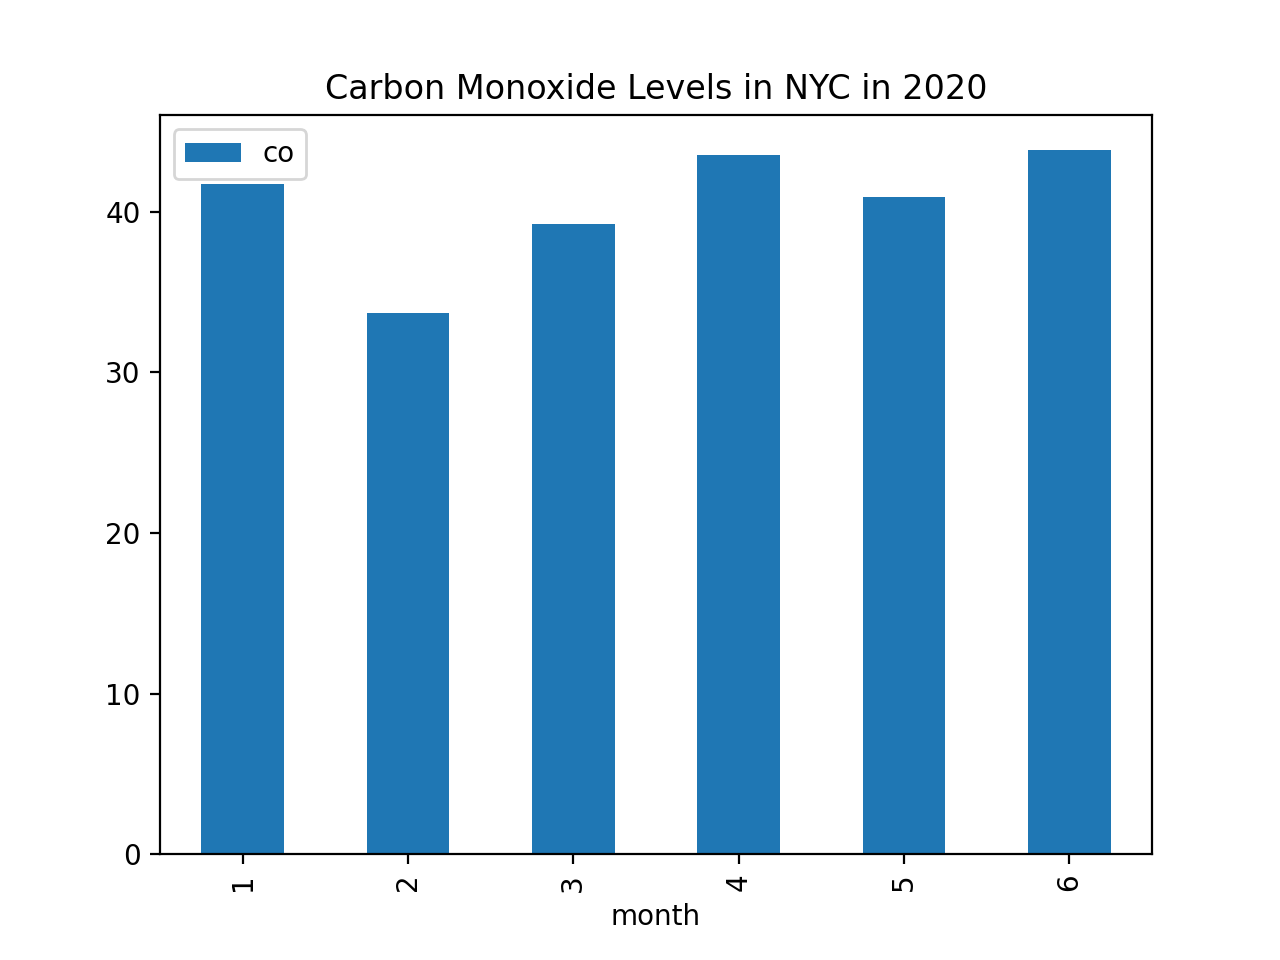

In [18]:
co = s.sql("""
    SELECT MONTH(Date) AS month, AVG(count) AS co
    FROM data
    WHERE Specie = 'co'
    GROUP BY MONTH(Date)""")
co = co.toPandas()
co1 = co.sort_values('month')
co1.plot(kind='bar',title='Carbon Monoxide Levels in NYC in 2020',x='month',y= 'co')
plt.show()